<h1 style="text-align: center;">Working Time Series Data</h1>

<img src='time_series_animation.gif'/>

## What is Time Series Data?

##### A series of values of a quantity obtained at successive times, often with equal intervals between them 

## Stationarity 

What is stationary data?

##### Stationary data is data in which summary statistics (mean, variance, covariance) are not a function of time

<h3 style="text-align: center;">Constant Mean</p>

<img src='mean_nonstationary.webp'/>

<h3 style="text-align: center;">Constant Variance</p>

<img src='variance_nonstationary.webp'/>

Which of the following graphs are stationary? Explain.

<img src="stationary_sorting_activity.jpg">

#### Why does data to be stationary for modeling? 

## Testing Stationarity

#### Dickey Fuller Test

The Dickey Fuller Test is a statistical test for testing stationarity. The Null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary. The Dickey Fuller test is available in stattools from the StatsModels module. 

## Processing Data to Achieve Stationarity

A series of steps can be taken to stationarize your data - also known -  as removing trends (linear trends, seasonaility/periodicity, etc - more details on transformations <a href='http://people.duke.edu/~rnau/whatuse.htm'>here</a>) - we do this by taking differences of the variable over time, log transforming, or seasonal differencing.

#### Differencing

We use differencing to remove your data's dependence on time (temporal dependence). 

Differencing is performed by subtracting the previous observation (lag=1) from the current observation.

difference(t) = observation(t) - observation(t-1)

In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
shampoo = pd.read_csv('data/shampoo.csv', header=0, usecols=[1])

In [3]:
shampoo.head()

,Sales of shampoo over a three year period
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3


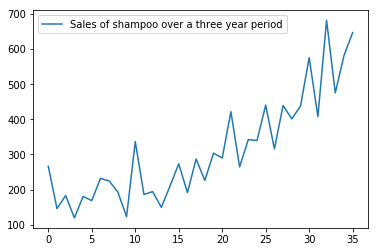

In [4]:
#plot of data to see visualize trends
shampoo.plot()

## Differencing in Practice

In [5]:
#call .diff off a pandas/numpy series to get differenced values
diff = shampoo.diff().rename(index=str, columns={"Sales of shampoo over a three year period": "Differenced Observations"})

In [6]:
diff.head()

,Differenced Observations
0,NaN
1,-120.1
2,37.2
3,-63.8
4,61.0


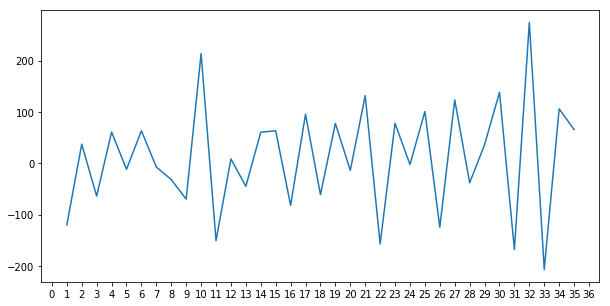

In [7]:
#plot of differenced data (more stationary)
pyplot.figure(figsize=(10,5))
pyplot.plot(diff)

Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. <b>The number of times we have to difference our data is the order of differencing</b> - we will use this information when building our model.

One we have achieved stationarity the next step in fitting a model to address any autocorrelation that remains in the differenced series. Time series exhbit two kinds of behaviors. Often, you can predict a value in a time series using a past value or values. Othertimes, the past values can be misleading - consider the stock market - everyday stock prices experience shock due to randomness. The effect of that shock generally diminishes quickly and has little effect on future prices. Determining which behaviors are present in our time series is essential so we can properly model the behavior. 

## Your Turn

Plot the global active power for the dataset below. Use differencing to transform the time series into a stationary representation, if necessary.

In [18]:
df = pd.read_csv("Global_Active_Power_Preprocessed.csv")
df.head()

,Date,Global_active_power,Sub_metering_3
0,2006-12-16,1209.176,4926.0
1,2006-12-17,3390.460,13341.0
2,2006-12-18,2203.826,14018.0
3,2006-12-19,1666.194,6197.0
4,2006-12-20,2225.748,14063.0


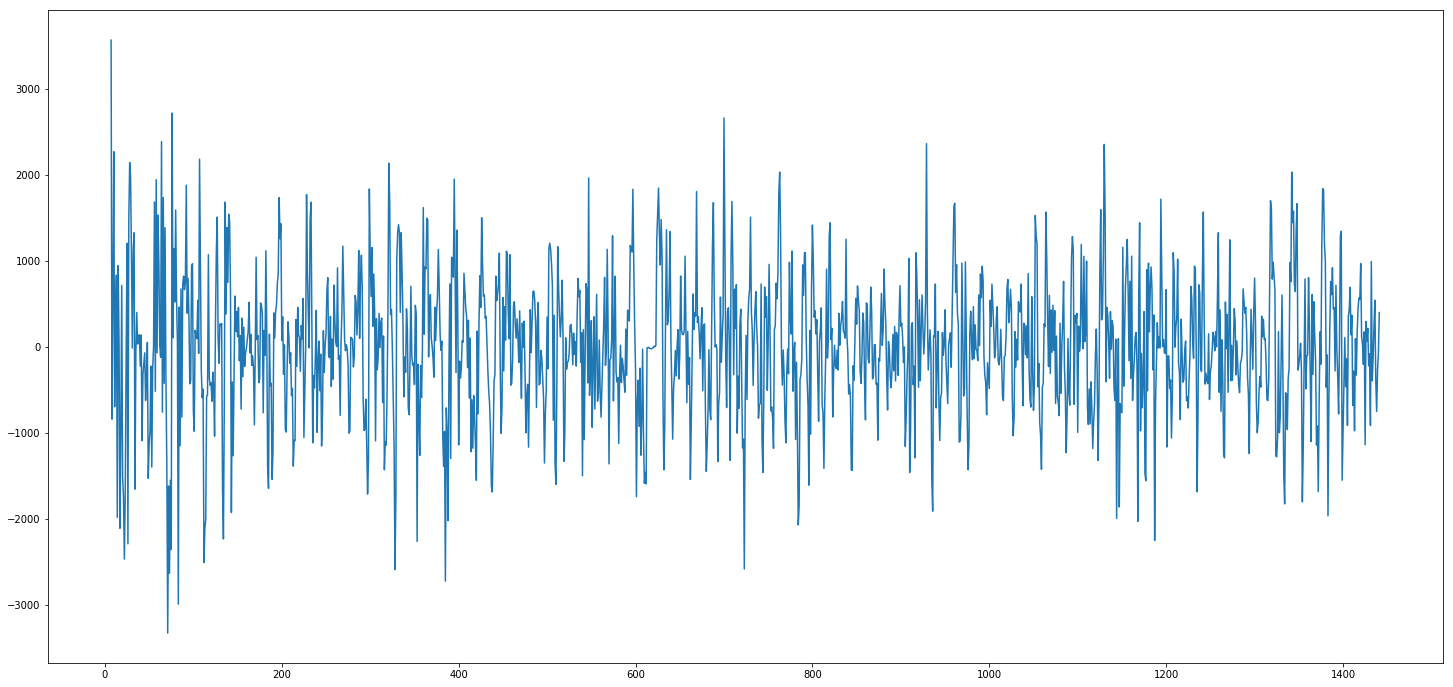

In [21]:
#You may also wish to compare the results of differencing with an alternative period such as 1 week...
df.Global_active_power.diff(periods=7).plot(figsize=(25,12))

## Autocorrelation

#### What is autocorrleation? 

It is the correlation between one time series and the same time series shifted by k periods. 

In [11]:
shampoo_sales_lag_1 = shampoo.shift(periods=1)
shampoo_sales_lag_2 = shampoo.shift(periods=2)

No handles with labels found to put in legend.


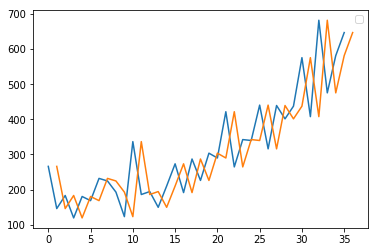

In [16]:
pyplot.plot(shampoo)
pyplot.plot(shampoo_sales_lag_1)
pyplot.legend()

No handles with labels found to put in legend.


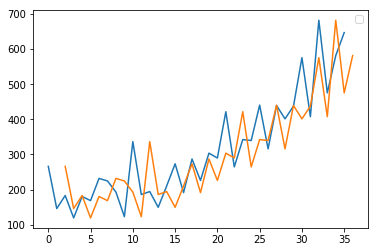

In [17]:
pyplot.plot(shampoo)
pyplot.plot(shampoo_sales_lag_2)
pyplot.legend()

#### ACF

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

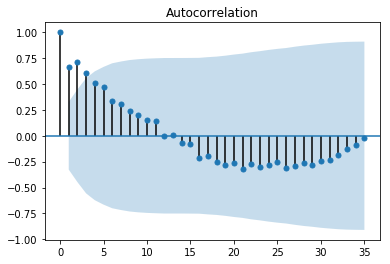

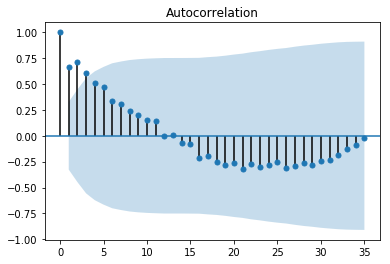

In [19]:
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(shampoo[:-1], alpha=.05)

#### PACF

Partial autocorrelation looks at the correlation between a point and particular lag without the influence of itermediary lags. This helps us see the direct relationship between certain lags. 

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

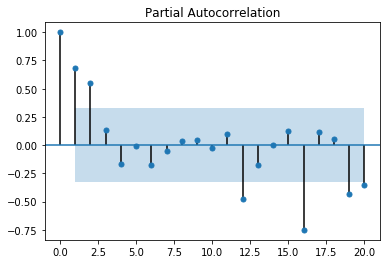

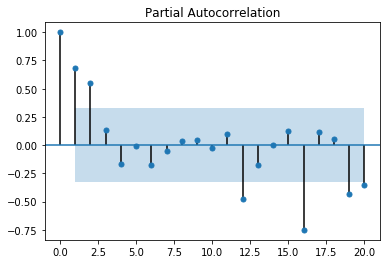

In [21]:
plot_pacf(shampoo[:-1], alpha=.05, lags=20)

## Additional Resources

Now that we now how to analyze the patterns in our time series we can proceed with creating models to create forecasts!


https://www.youtube.com/watch?v=Prpu_U5tKkE

https://newonlinecourses.science.psu.edu/stat510/node/41/
